# ***Imports***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# ***Dataset***

In [ ]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = columns)

feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# ***Data Balancing and Splitting***
- value_counts() :Return a Series containing counts of unique rows in the DataFrame.
- np.random.choice(class , size, replace or not(replace :Default is True, meaning that a value of a can be selected multiple times.))

In [ ]:
g = data[data.Class == 'g']
h = data[data.Class == 'h']
g_size = len(g)
h_size = len(h) 
difference = abs(g_size - h_size)

if g_size > h_size:
  extra_readings = np.random.choice(g.index, difference , replace=False)
  #update g after removing extra readings
  g = g.drop(extra_readings)

if h_size > g_size:
  extra_readings = np.random.choice(h.index, difference , replace=False)
  #update h after removing extra readings
  h = h.drop(extra_readings)

balanced_data = g.append(h)
display(balanced_data)
print(balanced_data['Class'].value_counts())

x = balanced_data[feature_names]
y = balanced_data['Class']


# x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.3, stratify=y)

data = pd.concat([x, y], axis=1)

data_g = data[data['Class'] == 'g']
data_h = data[data['Class'] == 'h']

data_test_g = data_g.sample(frac=0.3)
data_test_h = data_h.sample(frac=0.3)
data_test = pd.concat([data_test_g, data_test_h], axis=0)

data_test.index = range(len(data_test_g.index) + len(data_test_h.index))
y_test = data_test['Class']
x_test = data_test.drop('Class', axis=1)

data_train_g = data_g.drop(data_test_g.index)
data_train_h = data_h.drop(data_test_h.index)
data_train = pd.concat([data_train_g, data_train_h], axis=0)

data_train.index = range(len(data_train_g.index) + len(data_train_h.index))
y_train = data_train['Class']
x_train = data_train.drop('Class', axis=1)

display(x_train)
print(x_train.shape, x_test.shape)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


g    6688
h    6688
Name: Class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
2,45.6321,22.7100,3.0441,0.2213,0.1215,-18.3986,-20.6427,-14.3164,0.3822,178.2550
3,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260
4,46.0588,18.7870,3.2217,0.2431,0.1504,49.2704,34.1066,10.7955,8.6860,180.7830
...,...,...,...,...,...,...,...,...,...,...
9359,79.5528,44.9929,3.5488,0.1656,0.0900,-39.6213,53.7866,-30.0054,15.8075,311.5680
9360,31.8373,13.8734,2.8251,0.4169,0.1988,-16.4919,-27.1448,11.1098,11.3663,100.0566
9361,182.5003,76.5568,3.6872,0.1123,0.0666,192.2675,93.0302,-62.6192,82.1691,283.4731
9362,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166


(9364, 10) (4012, 10)


In [ ]:
y_train.value_counts()

g    4682
h    4682
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

g    2006
h    2006
Name: Class, dtype: int64

# ***Calculations***

In [ ]:
def calculations(y_test, y_predicted):
  cm = confusion_matrix(y_test , y_predicted)
  #sensitivity = (TP) / (TP + FN)
  sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])
    # specificity = (TN) / (TN + FP)
  specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])
     # precision = (TP) / (TP + FP)
  precision = (cm[1][1]) / (cm[1][1] + cm[0][1])
     # f1_score = 2 * (precision * recall) / (precision + recall)
  f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

  Accuracy = accuracy_score(y_test, y_predicted)
  print("Accuracy = " ,Accuracy)
  print("Precision = " ,precision)
  print("Sensitivity = " ,sensitivity)
  print("Specificity = " ,specificity)
  print("F-score = " ,f1_score)

# ***Decision Tree***

Decision Tree:
              precision    recall  f1-score   support

           g       0.79      0.80      0.79      2006
           h       0.80      0.78      0.79      2006

    accuracy                           0.79      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.79      0.79      0.79      4012

Accuracy =  0.7916251246261217
Precision =  0.7963525835866262
Sensitivity =  0.7836490528414756
Specificity =  0.7996011964107677
F-score =  0.7899497487437186


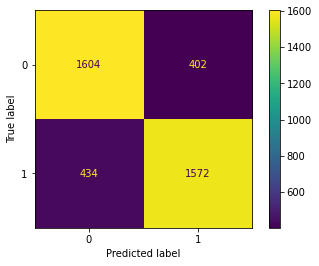

In [ ]:
def decisionTree(x_train, x_test, y_train, y_test):
    classified = DecisionTreeClassifier().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('Decision Tree:')
    print(classification_report(y_test, y_predicted))
    cm = confusion_matrix(y_test , y_predicted)
    temp = ConfusionMatrixDisplay(cm)
    calculations(y_test, y_predicted)
    temp.plot()
    plt.show()

decisionTree(x_train, x_test, y_train, y_test)  

# ***Naiive Bayes***

-------------------------------------------------------
Naive Bayes: 
              precision    recall  f1-score   support

           g       0.60      0.89      0.72      2006
           h       0.79      0.40      0.53      2006

    accuracy                           0.65      4012
   macro avg       0.69      0.65      0.62      4012
weighted avg       0.69      0.65      0.62      4012

Accuracy =  0.6463110667996012
Precision =  0.7897334649555775
Sensitivity =  0.3988035892323031
Specificity =  0.8938185443668993
F-score =  0.5299768135144087


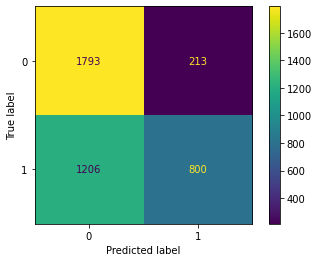

In [ ]:
def naiveBayes(x_train, x_test, y_train, y_test):
    classified = GaussianNB().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('-------------------------------------------------------')
    print('Naive Bayes: ')
    print(classification_report(y_test, y_predicted))
    cm = confusion_matrix(y_test , y_predicted)
    temp = ConfusionMatrixDisplay(cm)
    calculations(y_test, y_predicted)
    temp.plot()
    plt.show()

naiveBayes(x_train, x_test, y_train, y_test)

# ***K-NN***

In [ ]:
scaler = MinMaxScaler()

cols = x_train.columns

x_train = scaler.fit_transform(x_train) #checks the values using an equation where big values =1 and small values =0 (negative values =-1)
x_test = scaler.transform(x_test) #do it on test data

#convert to panda as the past lines returns numpy
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)

In [ ]:
def plotParameter(x, y, title, x_label, y_label):
    plt.title(title, fontsize='16')
    plt.plot(x, y)
    plt.xlabel(x_label, fontsize='13')
    plt.ylabel(y_label, fontsize='13')
    plt.grid()
    plt.show()

In [ ]:
def bestHyperparameter(start , end , step):
  k_range = range(start,end,step)
  k_score = []
  for i in k_range:
    classified = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=10) , scoring= 'accuracy')
    k_score.append(score.mean())
  plotParameter(k_range, k_score, "K Values", "k_values", "Mean Accuracy")
  return k_range[k_score.index(max(k_score))]

-------------------------------------------------------
K-NN: 


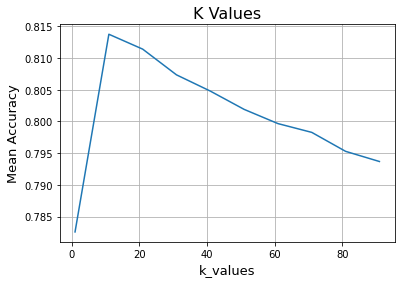

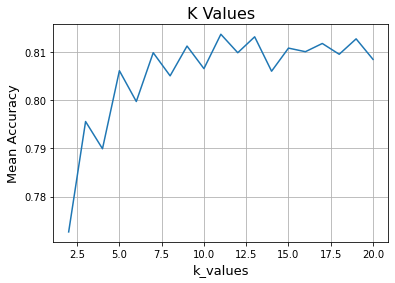

Old K value:  11
best K value:  11
              precision    recall  f1-score   support

           g       0.77      0.88      0.82      2006
           h       0.86      0.74      0.80      2006

    accuracy                           0.81      4012
   macro avg       0.82      0.81      0.81      4012
weighted avg       0.82      0.81      0.81      4012

Accuracy =  0.8115653040877367
Precision =  0.8633720930232558
Sensitivity =  0.7402791625124626
Specificity =  0.882851445663011
F-score =  0.7971014492753623


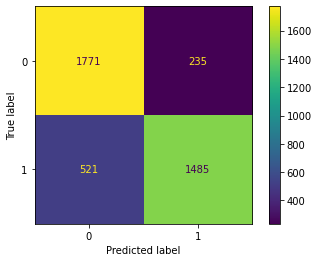

In [ ]:
def kNearestNeighbour(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('K-NN: ')
  old_k = bestHyperparameter(1,100,10)
  new_k = bestHyperparameter(old_k - 9, old_k + 10 , 1 )
  print('Old K value: ',old_k)
  print('best K value: ',new_k)
  classified = KNeighborsClassifier(n_neighbors= new_k)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()
kNearestNeighbour(x_train, x_test, y_train, y_test)

# ***Random Forest***

In [ ]:
def bestEstimator(start, end ,step):
  n_range = range(start , end, step)
  n_score = []
  for i in n_range:
    classified = RandomForestClassifier(n_estimators= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=10) , scoring= 'accuracy')
    n_score.append(score.mean())
  plotParameter(n_range, n_score, "N_estimators graph", "n_values", "Mean Accuracy")
  return n_range[(n_score.index(max(n_score)))]

-------------------------------------------------------
Random forest: 


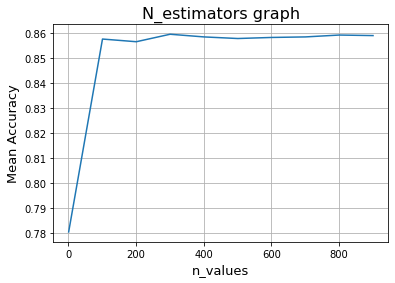

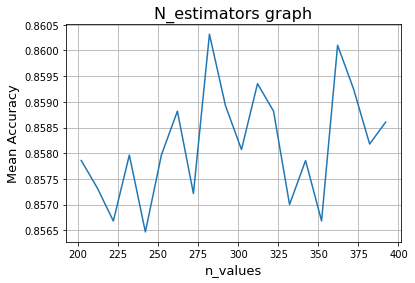

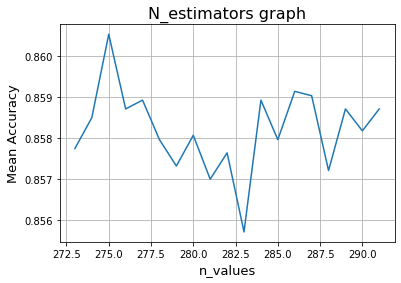

N_estimator :  301
N_estimator :  282
Best N_estimator :  275
              precision    recall  f1-score   support

           g       0.84      0.89      0.86      2006
           h       0.88      0.83      0.86      2006

    accuracy                           0.86      4012
   macro avg       0.86      0.86      0.86      4012
weighted avg       0.86      0.86      0.86      4012

Accuracy =  0.8606679960119641
Precision =  0.8838196286472149
Sensitivity =  0.8305084745762712
Specificity =  0.890827517447657
F-score =  0.8563351323567207


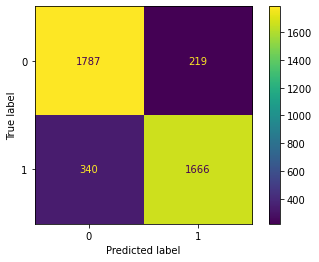

In [ ]:
def randomForest(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('Random forest: ')
  old_estimator = bestEstimator(1,1000,100)
  estimator = bestEstimator(old_estimator - 99 ,old_estimator + 100 ,10)
  new_estimator = bestEstimator(estimator - 9 ,estimator + 10 ,1)
  print( "N_estimator : " , old_estimator)
  print( "N_estimator : " , estimator)
  print( "Best N_estimator : " , new_estimator)
  classified =RandomForestClassifier(n_estimators= new_estimator)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()

randomForest(x_train, x_test, y_train, y_test)

# ***AdaBoost***

In [ ]:
def bestEstimator2(start, end ,step):
  n_range = range(start , end, step)
  n_score = []
  for i in n_range:
    classified = AdaBoostClassifier(n_estimators= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=5) , scoring= 'accuracy')
    n_score.append(score.mean())
  plotParameter(n_range, n_score, "N_estimators graph for AdaBoost", "n_values", "Mean Accuracy")
  return n_range[(n_score.index(max(n_score)))]

-------------------------------------------------------
AdaBoost: 


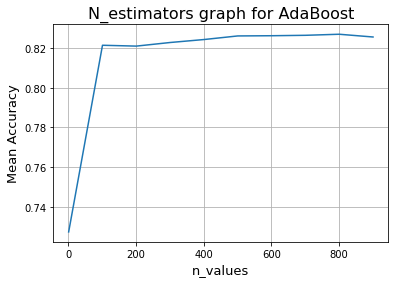

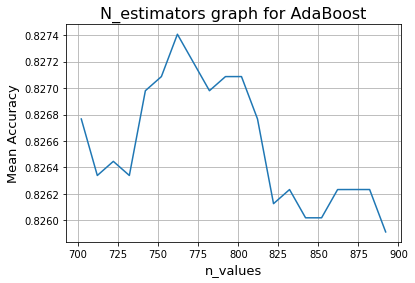

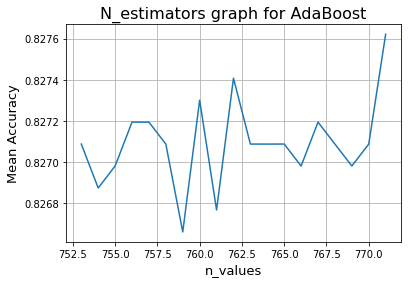

N_estimator :  801
N_estimator :  762
Best N_estimator :  771
              precision    recall  f1-score   support

           g       0.81      0.84      0.82      2006
           h       0.83      0.80      0.82      2007

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013

Accuracy =  0.8200847246449041
Precision =  0.8313563692625064
Sensitivity =  0.8031888390632785
Specificity =  0.8369890329012961
F-score =  0.8170299036999494


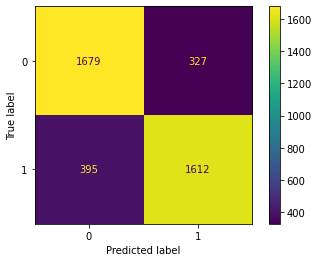

In [ ]:
def adaBoost(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('AdaBoost: ')
  old_estimator = bestEstimator2(1,1000,100)
  estimator = bestEstimator2(old_estimator - 99 ,old_estimator + 100 ,10)
  new_estimator = bestEstimator2(estimator - 9 ,estimator + 10 ,1)
  print( "N_estimator : " , old_estimator)
  print( "N_estimator : " , estimator)
  print( "Best N_estimator : " , new_estimator)
  classified = AdaBoostClassifier(n_estimators= new_estimator)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()

adaBoost(x_train, x_test, y_train, y_test)

In [ ]:
classifications = [decisionTree, naiveBayes, kNearestNeighbour, randomForest, adaBoost]
for classification in classifications:
  classification(x_train, x_test, y_train, y_test)

The bonus part:

In [ ]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 15.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler


columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = columns)

feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data['Class'] = [1 if each == "g" else 0 for each in data['Class']]

g = data[data.Class == 1]
h = data[data.Class == 0]
g_size = len(g)
h_size = len(h) 
difference = abs(g_size - h_size)

if g_size > h_size:
  extra_readings = np.random.choice(g.index, difference , replace=False)
  #update g after removing extra readings
  g = g.drop(extra_readings)

if h_size > g_size:
  extra_readings = np.random.choice(h.index, difference , replace=False)
  #update h after removing extra readings
  h = h.drop(extra_readings)

balanced_data = g.append(h)
display(balanced_data)
print(balanced_data['Class'].value_counts())

x = balanced_data[feature_names]
y = pd.DataFrame(balanced_data['Class'], columns=['Class'])

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


1    6688
0    6688
Name: Class, dtype: int64


In [ ]:
data = pd.concat([x, y], axis=1)

data_g = data[data['Class'] == 1]
data_h = data[data['Class'] == 0]

data_test_g = data_g.sample(frac=0.3)
data_test_h = data_h.sample(frac=0.3)
data_test = pd.concat([data_test_g, data_test_h], axis=0)

data_test.index = range(len(data_test_g.index) + len(data_test_h.index))
y_test = data_test['Class']
x_test = data_test.drop('Class', axis=1)

data_train_g = data_g.drop(data_test_g.index)
data_train_h = data_h.drop(data_test_h.index)
data_train = pd.concat([data_train_g, data_train_h], axis=0)

data_train.index = range(len(data_train_g.index) + len(data_train_h.index))
y_train = data_train['Class']
x_train = data_train.drop('Class', axis=1)

In [ ]:
data_train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
1,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
2,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
3,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
4,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.0940,1
...,...,...,...,...,...,...,...,...,...,...,...
9359,43.2980,17.3545,2.8307,0.2877,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299,0
9360,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
9361,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
9362,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
data_test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,23.9685,19.3675,2.4200,0.4030,0.2262,-18.6210,-18.1941,-15.5129,48.6381,179.8290,1
1,119.5150,39.6518,4.0179,0.1129,0.0586,133.7750,106.1690,-15.3093,1.6234,300.8640,1
2,16.0114,11.5852,2.3181,0.6202,0.3870,-0.0002,-0.6218,7.5023,6.3350,156.8430,1
3,21.5257,15.8974,2.6201,0.4341,0.2290,26.9538,10.3154,7.9841,6.6877,234.6860,1
4,21.5368,6.9542,2.0550,0.6872,0.3480,-25.7641,-5.2793,6.4756,5.5540,209.0050,1
...,...,...,...,...,...,...,...,...,...,...,...
4007,175.4850,89.1504,3.7786,0.1282,0.0762,-145.5870,129.1210,-81.6312,79.5470,347.3890,0
4008,22.8849,15.0983,2.5677,0.7124,0.4154,-4.7445,12.8972,6.8721,6.3728,184.3651,0
4009,33.4349,11.5495,2.6623,0.4113,0.2144,-34.7318,11.4743,-6.8420,86.2306,227.8970,0
4010,38.3579,13.5529,2.7690,0.4804,0.2503,-19.1756,-11.9527,-16.9762,2.0105,88.7378,0


In [ ]:
data_train2=data_train.reset_index(drop=True)
display(data_train2)
kfolds=StratifiedKFold(n_splits=5)
target=data_train2.loc[:,'Class']
fold_num = 1
for traini, valuei in kfolds.split(data_train2, target):
    train = data_train2.loc[traini,:]
    value = data_train2.loc[valuei,:]
    train.to_csv('train_fold_' + str(fold_num) + '.csv',index=False)
    value.to_csv('value_fold_' + str(fold_num) + '.csv',index=False)
    fold_num += 1


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
2,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
3,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480,1
4,33.1818,12.4655,2.4955,0.4696,0.2412,-17.0341,-22.0762,-8.1803,41.9290,41.3816,1
...,...,...,...,...,...,...,...,...,...,...,...
9359,182.5003,76.5568,3.6872,0.1123,0.0666,192.2675,93.0302,-62.6192,82.1691,283.4731,0
9360,43.2980,17.3545,2.8307,0.2877,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299,0
9361,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
9362,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
from torch.utils.data import Dataset
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset , DataLoader
from statistics import mean

class Data(torch.utils.data.Dataset):  
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data      
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]       
    def __len__ (self):
        return len(self.X_data)

class TestData(torch.utils.data.Dataset):
    def __init__(self, X_data):
        self.X_data = X_data     
    def __getitem__(self, index):
        return self.X_data[index]       
    def __len__ (self):
        return len(self.X_data)

class nn_classifier(nn.Module):
    def __init__(self,h1_size,h2_size):
        super(nn_classifier,self).__init__()
        self.hidden1=nn.Linear(10,h1_size)
        self.relu1=nn.ReLU()
        self.hidden2=nn.Linear(h1_size,h2_size)
        self.relu2=nn.ReLU()
        self.output=nn.Linear(h2_size,1)

    def forward(self,x):
        out=self.hidden1(x)
        out=self.relu1(out)
        out=self.hidden2(out)
        out=self.relu2(out)
        out=self.output(out)
        return out

device = "cuda" if torch.cuda.is_available() else "cpu"

def binary_accuracy(predicted_y, actual_y):
    pred_tag = torch.round(torch.sigmoid(predicted_y))
    total_correct_results = (pred_tag == actual_y).sum().float()
    accuracy = total_correct_results/actual_y.shape[0]
    accuracy = torch.round(accuracy * 100)
    return accuracy

def train_model(model,optimizer,train_loader,epochs_num,print_epochs):
    model.train()
    for e in range(1,epochs_num+1):
        epoch_loss = epoch_accuracy = 0
        for batchx, batchy in train_loader:
            batchx, batchy = batchx.to(device), batchy.to(device)
            optimizer.zero_grad()
            predicted_y = model(batchx)
            lossfunc = criterion(predicted_y, batchy.unsqueeze(1))
            accuracy = binary_accuracy(predicted_y, batchy.unsqueeze(1))
            lossfunc.backward()
            optimizer.step()

            epoch_loss += lossfunc.item()
            epoch_accuracy += accuracy.item()
        if print_epochs ==0:
          pass
        else:
          print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_accuracy/len(train_loader):.3f}')
    return model    



def evaluate_model(model,test_loader,actual_y):
    list_predicted_y = []
    model.eval()
    with torch.no_grad():
        for batchx in test_loader:
            batchx = batchx.to(device)
            predicted_y = model(batchx)
            predicted_y = torch.sigmoid(predicted_y)
            y_pred_tag = torch.round(predicted_y)
            list_predicted_y.append(y_pred_tag.cpu().numpy())

    y_pred_list = [a.squeeze().tolist() for a in list_predicted_y]
    accuracy=sklearn.metrics.accuracy_score(actual_y,y_pred_list)
    return accuracy , y_pred_list

def get_fold(value):
    data_value=pd.read_csv('/content/value_fold_'+str(value)+'.csv')
    data_train=pd.read_csv('/content/train_fold_'+str(value)+'.csv')
    return data_train,data_value



In [ ]:
import sklearn
range1=range(10,101,10)
range2=range(10,101,10)
accuracies=[]
for i in range1:
    row=[]
    for j in range2:
        accs=[]
        if (j-i<=30 and j>=i) or (j-i>=-30 and j<=i):
          for k in range(1,6):
              train_fold,target_fold=get_fold(k)
              x_train_fold = train_fold[feature_names]
              y_train_fold = train_fold['Class']
              x_target_fold = target_fold[feature_names]
              y_target_fold = target_fold['Class']
              scaler = sklearn.preprocessing.StandardScaler()
              x_train_fold = scaler.fit_transform(x_train_fold)
              x_target_fold = scaler.transform(x_target_fold)
              train_fold = Data(torch.FloatTensor(x_train_fold),torch.FloatTensor(y_train_fold))
              target_fold = TestData(torch.FloatTensor(x_target_fold))
              train_loader = DataLoader(dataset=train_fold, batch_size=512)
              target_loader = DataLoader(dataset=target_fold, batch_size=1)
              model = nn_classifier(i,j).to(device)
              criterion = nn.BCEWithLogitsLoss()
              optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
              model=train_model(model,optimizer,train_loader,100,0)
              accuracy,pred_list=evaluate_model(model,target_loader,y_target_fold.values.tolist())
              accs.append(accuracy)
          mean_accuracy=mean(accs)
          row.append(mean_accuracy)
          print("The mean accuracy at "+str(i)+" "+str(j)+" is = "+str(mean_accuracy))
        else:
          row.append(0)
          print("The mean accuracy at "+str(i)+" "+str(j)+"is = 0")
    accuracies.append(row)


The mean accuracy at 10 10 is = 0.7911166783030104
The mean accuracy at 10 20 is = 0.8102314263419442
The mean accuracy at 10 30 is = 0.8009399770011089
The mean accuracy at 10 40 is = 0.8116193455355228
The mean accuracy at 10 50is = 0
The mean accuracy at 10 60is = 0
The mean accuracy at 10 70is = 0
The mean accuracy at 10 80is = 0
The mean accuracy at 10 90is = 0
The mean accuracy at 10 100is = 0
The mean accuracy at 20 10 is = 0.8145031623475296
The mean accuracy at 20 20 is = 0.8173864087505305
The mean accuracy at 20 30 is = 0.8203763786785677
The mean accuracy at 20 40 is = 0.8200558658580549
The mean accuracy at 20 50 is = 0.8200559799398561
The mean accuracy at 20 60is = 0
The mean accuracy at 20 70is = 0
The mean accuracy at 20 80is = 0
The mean accuracy at 20 90is = 0
The mean accuracy at 20 100is = 0
The mean accuracy at 30 10 is = 0.8196284583898038
The mean accuracy at 30 20 is = 0.822298657029036
The mean accuracy at 30 30 is = 0.8210163205424817
The mean accuracy at 30 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 35.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


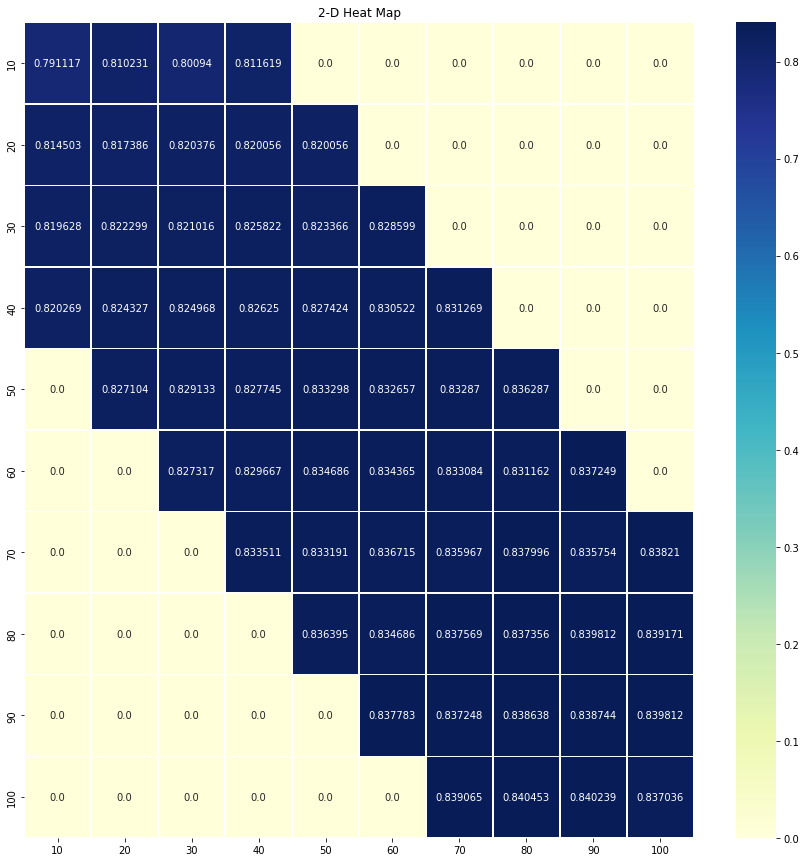

In [ ]:
!pip install -U seaborn
import seaborn as sns
arr_heat=np.array(accuracies)
ticks=[10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(15,15))
ax = sns.heatmap( arr_heat ,annot=True,fmt=".6", linewidth = 0.5,xticklabels=ticks,yticklabels=ticks,cmap="YlGnBu")
plt.title( "2-D Heat Map" )
plt.show()

From the heat map above we deduce that the combination(100,80) gives the best accuracy of 84.04%

# The final neural network model:

In [ ]:
data = pd.concat([x, y], axis=1)

data_g = data[data['Class'] == 1]
data_h = data[data['Class'] == 0]

data_test_g = data_g.sample(frac=0.3)
data_test_h = data_h.sample(frac=0.3)
data_test = pd.concat([data_test_g, data_test_h], axis=0)

data_test.index = range(len(data_test_g.index) + len(data_test_h.index))
y_test = data_test['Class']
x_test = data_test.drop('Class', axis=1)

data_train_g = data_g.drop(data_test_g.index)
data_train_h = data_h.drop(data_test_h.index)
data_train = pd.concat([data_train_g, data_train_h], axis=0)

data_train.index = range(len(data_train_g.index) + len(data_train_h.index))
y_train = data_train['Class']
x_train = data_train.drop('Class', axis=1)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
data_train = Data(torch.FloatTensor(x_train),torch.FloatTensor(y_train))
data_test = TestData(torch.FloatTensor(x_test))
train_loader = DataLoader(dataset=data_train, batch_size=512)
test_loader = DataLoader(dataset=data_test, batch_size=1)
model = nn_classifier(100,80).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [ ]:
model=train_model(model,optimizer,train_loader,150,1)

Epoch 001: | Loss: 0.36014 | Acc: 83.263
Epoch 002: | Loss: 0.35974 | Acc: 83.263
Epoch 003: | Loss: 0.35935 | Acc: 83.263
Epoch 004: | Loss: 0.35888 | Acc: 83.211
Epoch 005: | Loss: 0.35859 | Acc: 83.263
Epoch 006: | Loss: 0.35812 | Acc: 83.421
Epoch 007: | Loss: 0.35779 | Acc: 83.421
Epoch 008: | Loss: 0.35735 | Acc: 83.421
Epoch 009: | Loss: 0.35705 | Acc: 83.421
Epoch 010: | Loss: 0.35657 | Acc: 83.421
Epoch 011: | Loss: 0.35630 | Acc: 83.474
Epoch 012: | Loss: 0.35592 | Acc: 83.368
Epoch 013: | Loss: 0.35559 | Acc: 83.316
Epoch 014: | Loss: 0.35522 | Acc: 83.421
Epoch 015: | Loss: 0.35491 | Acc: 83.474
Epoch 016: | Loss: 0.35453 | Acc: 83.526
Epoch 017: | Loss: 0.35423 | Acc: 83.526
Epoch 018: | Loss: 0.35391 | Acc: 83.684
Epoch 019: | Loss: 0.35352 | Acc: 83.632
Epoch 020: | Loss: 0.35325 | Acc: 83.684
Epoch 021: | Loss: 0.35290 | Acc: 83.632
Epoch 022: | Loss: 0.35269 | Acc: 83.684
Epoch 023: | Loss: 0.35221 | Acc: 83.684
Epoch 024: | Loss: 0.35203 | Acc: 83.684
Epoch 025: | Los

In [ ]:
print(len(y_test.values.tolist()))

4012


In [ ]:
final_accuracy , final_predicted_y = evaluate_model(model,test_loader,y_test.values.tolist())

In [ ]:
def calculations(y_test, y_predicted):
  cm = confusion_matrix(y_test , y_predicted)
  #sensitivity = (TP) / (TP + FN)
  sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])
    # specificity = (TN) / (TN + FP)
  specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])
     # precision = (TP) / (TP + FP)
  precision = (cm[1][1]) / (cm[1][1] + cm[0][1])
     # f1_score = 2 * (precision * recall) / (precision + recall)
  f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

  Accuracy = accuracy_score(y_test, y_predicted)
  print("Accuracy = " ,Accuracy)
  print("Precision = " ,precision)
  print("Sensitivity = " ,sensitivity)
  print("Specificity = " ,specificity)
  print("F-score = " ,f1_score)

In [ ]:
calculations(y_test, final_predicted_y)

Accuracy =  0.8509471585244267
Precision =  0.8330179754020813
Sensitivity =  0.8778664007976071
Specificity =  0.8240279162512463
F-score =  0.8548543689320388


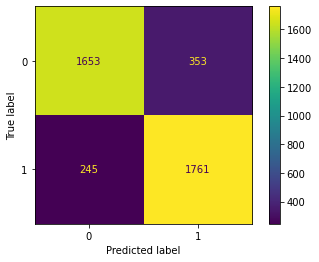

In [ ]:
cm = confusion_matrix(y_test , final_predicted_y)

temp = ConfusionMatrixDisplay(cm)
temp.plot()